In [3]:
import pandas as pd

# Load the Iris dataset
file_path = "IRIS.csv"  # Replace with the correct path to your file
try:
    iris_data = pd.read_csv(file_path)
    print("Dataset Loaded Successfully!")
    print("\nDataset Information:")
    print(iris_data.info())
    print("\nFirst 5 Rows of the Dataset:")
    print(iris_data.head())
except Exception as e:
    print(f"Error loading dataset: {e}")

Dataset Loaded Successfully!

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

First 5 Rows of the Dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Preprocessing

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Load the dataset
# Make sure you replace 'IRIS.csv' with the actual path to your dataset
iris_data = pd.read_csv('IRIS.csv')

print("Dataset Loaded Successfully!")
print(iris_data.info())
print("\nFirst 5 Rows of the Dataset:")
print(iris_data.head())

# Step 2: Preprocess the data
def preprocess_iris_data(data):
    """
    Prepares the Iris dataset for analysis:
    - Encodes the species column into numerical format.
    - Scales numeric features for consistent analysis.

    Args:
        data (DataFrame): The raw Iris dataset.

    Returns:
        processed_data (DataFrame): The dataset with scaled features and encoded target.
        scaler (StandardScaler): The scaler used for standardizing the data.
        label_encoder (LabelEncoder): The encoder used for the species column.
    """
    # Convert the species column into numbers for clustering and fitting
    label_encoder = LabelEncoder()
    data['species_encoded'] = label_encoder.fit_transform(data['species'])

    # Define the feature columns for scaling
    numeric_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

    # Scale numeric features for uniformity
    scaler = StandardScaler()
    data[numeric_features] = scaler.fit_transform(data[numeric_features])

    return data, scaler, label_encoder

# Apply preprocessing to the Iris dataset
processed_data, scaler, label_encoder = preprocess_iris_data(iris_data)

# Step 3: Take a look at the processed data
print("\nPreprocessed Iris Dataset (First 5 Rows):")
print(processed_data.head())


Dataset Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

First 5 Rows of the Dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Preprocessed Iris Dataset (First 5 Rows):
   sepal_length  sepal

Now Lets Do EDA


Descriptive Statistics:
              count          mean      std       min       25%       50%  \
sepal_length  150.0 -4.736952e-16  1.00335 -1.870024 -0.900681 -0.052506   
sepal_width   150.0 -6.631732e-16  1.00335 -2.438987 -0.587764 -0.124958   
petal_length  150.0  3.315866e-16  1.00335 -1.568735 -1.227541  0.336266   
petal_width   150.0 -2.842171e-16  1.00335 -1.444450 -1.181504  0.133226   

                   75%       max    median      skew  kurtosis  
sepal_length  0.674501  2.492019 -0.052506  0.314911 -0.552064  
sepal_width   0.569251  3.114684 -0.124958  0.334053  0.290781  
petal_length  0.762759  1.786341  0.336266 -0.274464 -1.401921  
petal_width   0.790591  1.710902  0.133226 -0.104997 -1.339754  


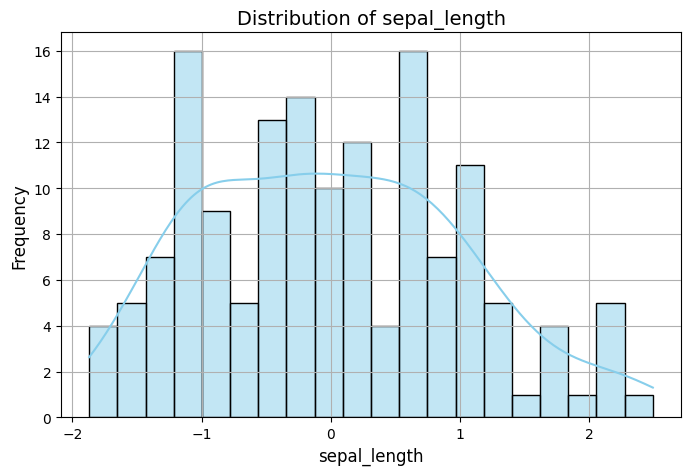

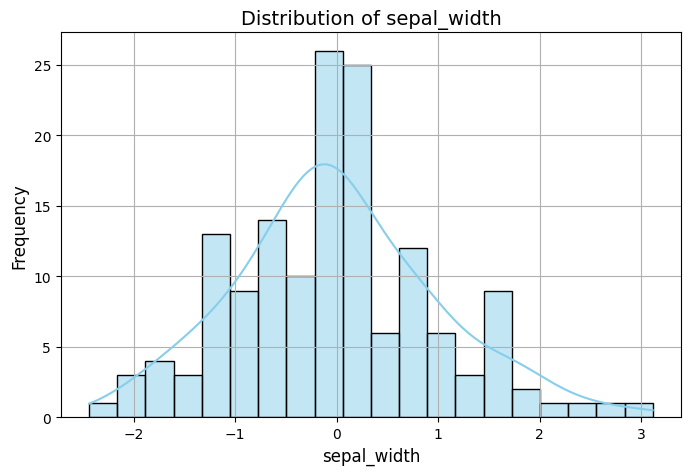

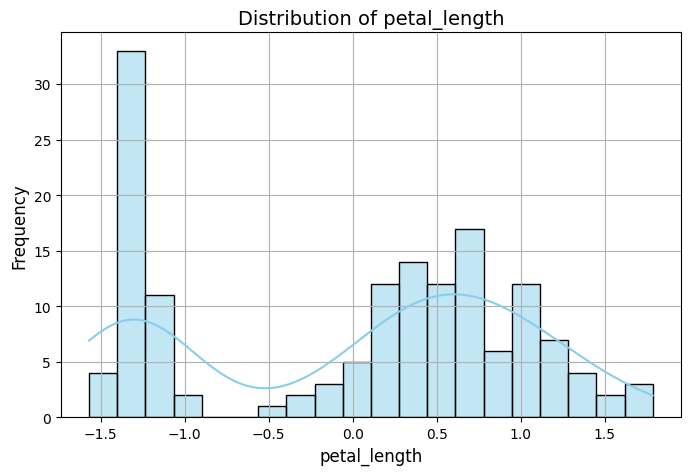

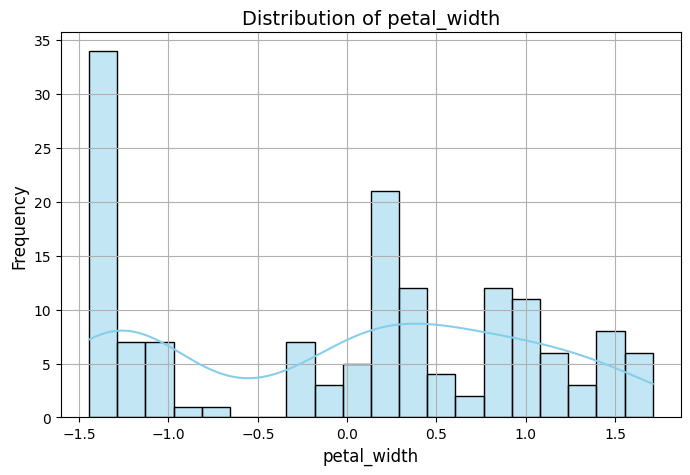

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Compute descriptive statistics
def compute_statistics(data, columns):
    """
    Computes basic descriptive statistics for numeric columns.

    Args:
        data (DataFrame): The dataset.
        columns (list): List of column names to compute statistics for.

    Returns:
        DataFrame: Summary statistics (mean, median, std, skewness, kurtosis).
    """
    stats = data[columns].describe().T
    stats['median'] = data[columns].median()
    stats['skew'] = data[columns].skew()
    stats['kurtosis'] = data[columns].kurtosis()
    return stats

# Define numeric columns
numeric_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
statistics = compute_statistics(processed_data, numeric_columns)
print("\nDescriptive Statistics:")
print(statistics)

# Step 2: Create histogram plots
def plot_histogram(data, column):
    """
    Plots a histogram for a given column.

    Args:
        data (DataFrame): The dataset.
        column (str): Column name to plot.

    Returns:
        None
    """
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True, bins=20, color="skyblue")
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.show()

# Plot histograms for each numeric column
for col in numeric_columns:
    plot_histogram(processed_data, col)

Correlation Heatmap

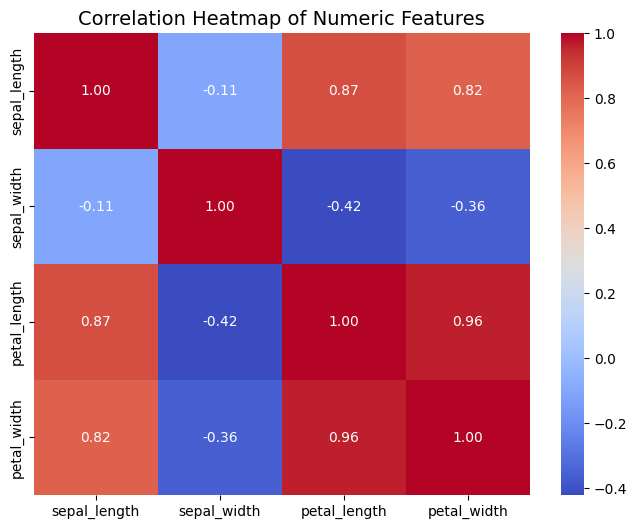

In [7]:
def plot_correlation_heatmap(data, columns):
    """
    Plots a heatmap showing the correlation between numeric columns.

    Args:
        data (DataFrame): The dataset.
        columns (list): List of numeric columns to include in the heatmap.

    Returns:
        None
    """
    plt.figure(figsize=(8, 6))
    correlation_matrix = data[columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
    plt.show()

# Call the function to plot the heatmap
plot_correlation_heatmap(processed_data, numeric_columns)


**Clustering Section**

K-Means Clustering with Elbow Method

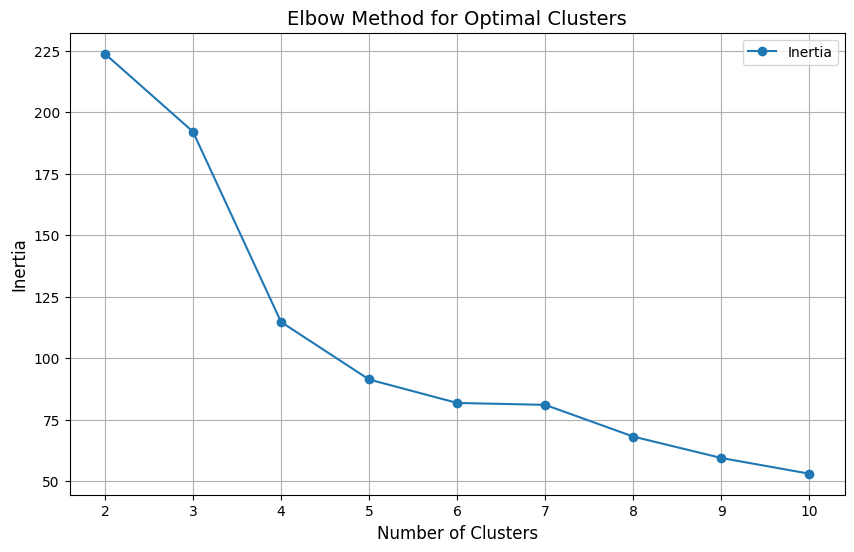

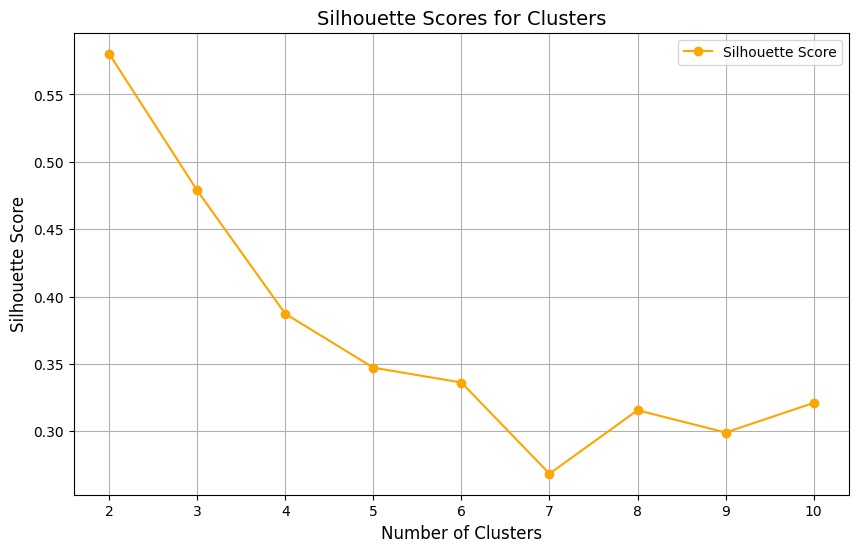

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def plot_elbow_method(data, max_clusters=10):
    """
    Plot the Elbow Method to determine the optimal number of clusters.

    Args:
        data (array-like): Data to be clustered.
        max_clusters (int): Maximum number of clusters to test.

    Returns:
        None
    """
    inertia = []
    silhouette_scores = []
    cluster_range = range(2, max_clusters + 1)

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    # Plot the Elbow Curve
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, inertia, marker='o', label="Inertia")
    plt.xlabel("Number of Clusters", fontsize=12)
    plt.ylabel("Inertia", fontsize=12)
    plt.title("Elbow Method for Optimal Clusters", fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Silhouette Scores
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, silhouette_scores, marker='o', color="orange", label="Silhouette Score")
    plt.xlabel("Number of Clusters", fontsize=12)
    plt.ylabel("Silhouette Score", fontsize=12)
    plt.title("Silhouette Scores for Clusters", fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

# Call the function to plot the Elbow Method
plot_elbow_method(processed_data[numeric_columns])

Apply Clustering and Visualize Results

In this Section we will apply clustering and will visualize the result

Preparing data for clustering...
Excluded columns: ['species']
Prepared data shape: (150, 5)
Performing K-Means clustering with 3 clusters...
Clustering completed!
Reducing dimensions for visualization...
Dimension reduction completed!
Visualizing clusters...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


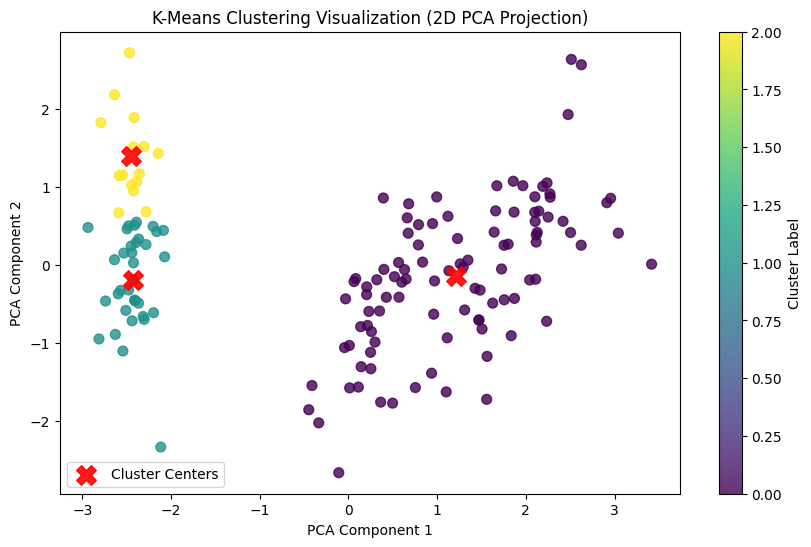

In [10]:
# Ensure only numeric columns are used for clustering by excluding non-numeric columns
def prepare_data_for_clustering(data, exclude_columns):
    """
    Prepares the data for clustering by removing specified columns.

    Args:
    - data (pd.DataFrame): The processed dataset.
    - exclude_columns (list): A list of columns to exclude (e.g., categorical labels).

    Returns:
    - numeric_data (pd.DataFrame): Dataset with only numeric columns.
    """
    print("Preparing data for clustering...")
    numeric_data = data.drop(columns=exclude_columns, errors='ignore')
    print(f"Excluded columns: {exclude_columns}")
    print(f"Prepared data shape: {numeric_data.shape}")
    return numeric_data

# Prepare data by excluding the 'species' column
numeric_data = prepare_data_for_clustering(processed_data, exclude_columns=['species'])

# Apply clustering and visualize results
kmeans_model, cluster_labels = perform_clustering_and_visualize(numeric_data, optimal_clusters)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def train_and_evaluate_regression(data, feature_columns, target_column):
    """
    Train and evaluate a linear regression model.

    Args:
    - data: DataFrame containing the dataset.
    - feature_columns: List of feature columns for regression.
    - target_column: Target column to predict.

    Returns:
    - model: Trained regression model.
    - metrics: Dictionary containing RMSE and R² scores.
    """
    print(f"\nTraining regression model for target: {target_column}")
    X = data[feature_columns]
    y = data[target_column]

    # Train-test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    metrics = {'RMSE': rmse, 'R²': r2}

    print(f"Metrics for {target_column}: {metrics}")
    return model, metrics

# Define features and target
feature_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target_column = 'sepal_length'

# Train and evaluate
regression_model, regression_metrics = train_and_evaluate_regression(processed_data, feature_columns, target_column)


Training regression model for target: sepal_length
Metrics for sepal_length: {'RMSE': 4.9646965589479765e-16, 'R²': 1.0}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Future Predictions

In [14]:
def train_model_with_correct_features(data, target_column, feature_columns):
    """
    Train a regression model on the provided dataset with the correct feature columns.

    Args:
    - data (DataFrame): The dataset containing features and target.
    - target_column (str): The target column for the regression.
    - feature_columns (list): The list of input feature columns.

    Returns:
    - model: The trained regression model.
    - scaler: The fitted scaler for standardizing data.
    """
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import StandardScaler

    # Extract features and target
    X = data[feature_columns]
    y = data[target_column]

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train the regression model
    model = LinearRegression()
    model.fit(X_scaled, y)

    return model, scaler

# Redefine the feature columns
feature_columns = ['sepal_width', 'petal_length', 'petal_width']  # Excluding sepal_length

# Train the regression model with the correct features
regression_model, scaler = train_model_with_correct_features(processed_data, 'sepal_length', feature_columns)

# Prediction function with the corrected new data
def predict_new_data_fixed(regression_model, scaler, new_data, feature_columns):
    """
    Predict values for new data using the trained regression model.

    Args:
    - regression_model: The trained regression model.
    - scaler: The scaler used for standardization during training.
    - new_data: A DataFrame containing new samples to predict on.
    - feature_columns: List of feature columns used during training.

    Returns:
    - predictions_df: A DataFrame containing original data and predicted values.
    """
    print("\nStandardizing new data using the scaler...")
    # Ensure the new data aligns with the feature columns
    new_data_aligned = new_data[feature_columns]

    # Standardize the new data
    standardized_new_data = scaler.transform(new_data_aligned)

    print("Predicting using the regression model...")
    predictions = regression_model.predict(standardized_new_data)

    # Add predictions to the new data
    predictions_df = new_data.copy()
    predictions_df['Predicted_Sepal_Length'] = predictions

    return predictions_df

# Define new data for prediction
new_data = pd.DataFrame({
    'sepal_width': [3.5, 3.0],
    'petal_length': [1.4, 5.1],
    'petal_width': [0.2, 1.8]
})

# Predict using the corrected function
predicted_new_data = predict_new_data_fixed(
    regression_model=regression_model,
    scaler=scaler,
    new_data=new_data,
    feature_columns=feature_columns
)

print("\n--- Corrected Future Predictions ---")
print(predicted_new_data)



Standardizing new data using the scaler...
Predicting using the regression model...

--- Corrected Future Predictions ---
   sepal_width  petal_length  petal_width  Predicted_Sepal_Length
0          3.5           1.4          0.2                3.217620
1          3.0           5.1          1.8                7.822532
